In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import math

well_df = pd.read_excel("Oil Well Dataset.xlsx")
#Show the 1st 5 rows of the original dataset
well_df.head()

,DATEPRD,ON_STREAM_HRS,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2014-04-22,24.0,107.362,37.939,78.935,631,90439,0
1,2014-04-23,24.0,99.187,60.757,70.627,1166,165720,0
2,2014-04-24,24.0,94.601,63.047,66.049,1550,221707,0
3,2014-04-25,24.0,89.988,64.547,61.405,1249,178064,0
4,2014-04-26,24.0,84.777,65.724,56.148,1346,192602,0


In [2]:
well_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7992 entries, 0 to 7991
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATEPRD        7992 non-null   datetime64[ns]
 1   ON_STREAM_HRS  7992 non-null   float64       
 2   AVG_WHP_P      7992 non-null   float64       
 3   AVG_WHT_P      7992 non-null   float64       
 4   DP_CHOKE_SIZE  7992 non-null   float64       
 5   BORE_OIL_VOL   7992 non-null   int64         
 6   BORE_GAS_VOL   7992 non-null   int64         
 7   BORE_WAT_VOL   7992 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 499.6 KB


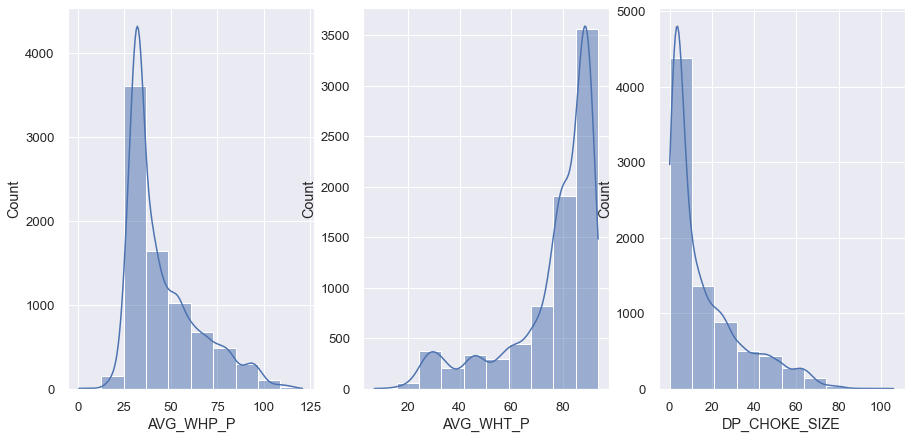

In [3]:
### Visualize the pressure, temperature, and chole data

# Use the seaborn style and set the font size
plt.style.use("seaborn")
sns.set(font_scale=1.2)

# Create the figure and axis for the subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 7))

# Plot a histogram for elongation on the first axis
sns.histplot(well_df["AVG_WHP_P"], kde=True, ax=ax1, bins=10)

# Plot a histogram for yield strength on the second axis
sns.histplot(data=well_df["AVG_WHT_P"], kde=True, ax=ax2, bins=10)

# Plot a histogram for tensile strength on the third axis
sns.histplot(data=well_df["DP_CHOKE_SIZE"], kde=True, ax=ax3, bins=10)

# Show the plot
plt.show()

# Close the plot
plt.close()

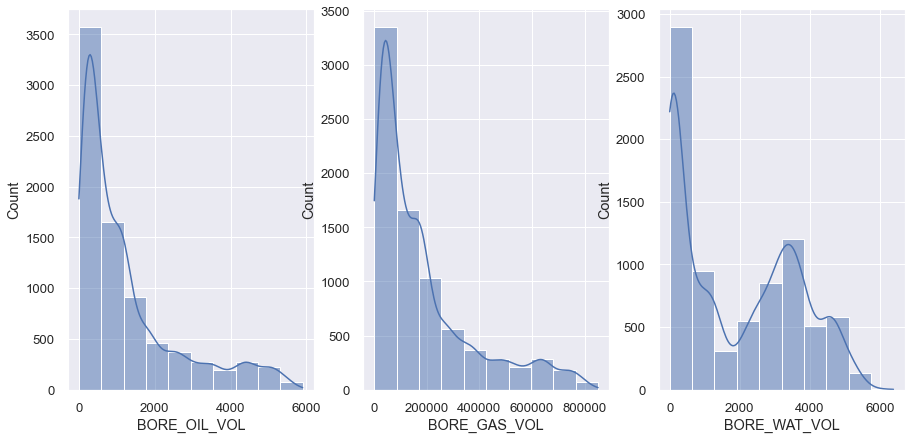

In [4]:
### Visualize the oil, gas, and water flow data

# Use the seaborn style and set the font size
plt.style.use("seaborn")
sns.set(font_scale=1.2)

# Create the figure and axis for the subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 7))

# Plot a histogram for elongation on the first axis
sns.histplot(well_df["BORE_OIL_VOL"], kde=True, ax=ax1, bins=10)

# Plot a histogram for yield strength on the second axis
sns.histplot(data=well_df["BORE_GAS_VOL"], kde=True, ax=ax2, bins=10)

# Plot a histogram for tensile strength on the third axis
sns.histplot(data=well_df["BORE_WAT_VOL"], kde=True, ax=ax3, bins=10)

# Show the plot
plt.show()

# Close the plot
plt.close()

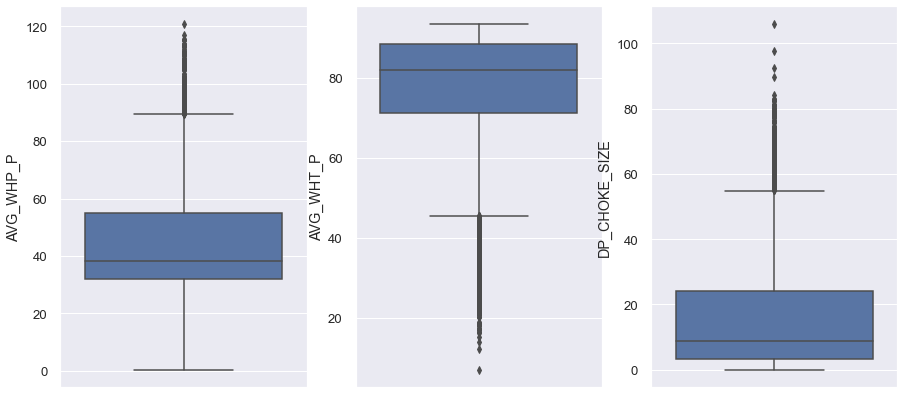

In [5]:
##Better visualize the input data using boxplots that show: mean, interquartile range, and outliers. dataiku, data fusion

# Set plotting style and font size
plt.style.use("seaborn")
sns.set(font_scale=1.2)

# Create the figure and axis
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 7))

# Assigning a graph to each axis
sns.boxplot(y=well_df["AVG_WHP_P"], ax=ax1)
sns.boxplot(y=well_df["AVG_WHT_P"], ax=ax2)
sns.boxplot(y=well_df["DP_CHOKE_SIZE"], ax=ax3)

# Display the plot
plt.show()

In [6]:
###Prepare the data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# normalize new input data (AVG_WHP_P, AVG_WHT_P, DP_CHOKE_SIZE)
def normalize_data(df = well_df):
    df_min_max_scaled = df.copy() # create a copy of the input DataFrame
    # iterate over each column in the copy and normalize it
    for column in df_min_max_scaled.columns[2:5]:
        df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
    # convert the normalized DataFrame to a list
    x = df_min_max_scaled[df_min_max_scaled.columns[2:5]].values.tolist()
    return x # return the list

# split the data to training and testing samples
def split_data(output, df=well_df):
    x = normalize_data(df) # normalize the data using the previous function
    y = df[output].values.tolist() # extract the output column and convert it to a list
    # split the data into training and testing sets using a 75:25 split and a fixed random state of 3
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3)
    return x_train, x_test, y_train, y_test # return the training and testing sets

# normalize a new datapoint
def normalize_point(point):
    df_slice = well_df[well_df.columns[2:5]] # extract a slice of the original DataFrame containing the input columns
    # iterate over each input column in the slice and normalize the corresponding value in the input point
    for i in range(len(df_slice.columns)):
        point[i] = (point[i] - df_slice[df_slice.columns[i]].min()) / (df_slice[df_slice.columns[i]].max() - df_slice[df_slice.columns[i]].min())
    return np.array([point])

In [7]:
#Statistics for the dataset's features

well_df.describe()

,ON_STREAM_HRS,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000
mean,23.076146,45.234003,76.081832,16.149980,1252.201201,184074.518644,1914.731481
std,3.429233,18.928240,17.629861,17.352937,1342.409387,190034.384886,1691.956812
min,0.250000,0.490000,7.037000,0.050000,1.000000,89.000000,0.000000
25%,24.000000,31.941750,71.225000,3.350250,272.000000,42186.750000,170.000000
50%,24.000000,38.176500,81.890000,8.772000,716.000000,111194.500000,1485.500000
75%,24.000000,54.925250,88.442000,23.967750,1651.000000,251219.500000,3411.250000
max,25.000000,120.889000,93.510000,106.035000,5902.000000,851132.000000,6392.000000


In [8]:
# Run KNN model and evaluate it using k-fold cross-validation for R-squared score and RMSE
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#train the KNN model
def run_model_KNN_reg(n):
    scores = {}
    for flow in well_df.columns[5:]:
        x_train, x_test, y_train, y_test = split_data(flow, well_df)
        reg = KNeighborsRegressor(n_neighbors=n)
        reg.fit(x_train, y_train)
        scores[flow] = [reg.score(x_train, y_train), reg.score(x_test, y_test)]
    return scores

#train the polynomial model
def run_model_poly_reg(n):
    scores = {}
    for flow in well_df.columns[5:]:        
        X_train, X_test, y_train, y_test = split_data(flow)
        poly_model = PolynomialFeatures(degree=n, include_bias=False)
        X_poly_train = poly_model.fit_transform(X_train)
        X_poly_test = poly_model.fit_transform(X_test)
        
        lin_reg = LinearRegression()
        lin_reg.fit(X_poly_train, y_train)
        y_train_pred = lin_reg.predict(X_poly_train)
        train_r2 = r2_score(y_train, y_train_pred)
        
        lin_reg = LinearRegression()
        lin_reg.fit(X_poly_test, y_test)
        y_test_pred = lin_reg.predict(X_poly_test)
        test_r2 = r2_score(y_test, y_test_pred)
        scores[flow] = [train_r2, test_r2]
    return scores

#train the RF model
def run_model_RF_reg(estimators):
    scores = {}
    for flow in well_df.columns[5:]:
        x_train, x_test, y_train, y_test = split_data(flow, well_df)
        reg = RandomForestRegressor(n_estimators=estimators)
        reg.fit(x_train, y_train)
        scores[flow] = [reg.score(x_train, y_train), reg.score(x_test, y_test)]
    return scores

In [9]:
scores = run_model_KNN_reg(6)
print(scores)

scores = run_model_poly_reg(15)
print(scores)

scores = run_model_RF_reg(100)
print(scores)

{'BORE_OIL_VOL': [0.920175958864625, 0.8917620355686894], 'BORE_GAS_VOL': [0.9179234387593774, 0.8882764291398985], 'BORE_WAT_VOL': [0.9541134298236262, 0.9254530850726868]}
{'BORE_OIL_VOL': [0.92694828721852, 0.9322848629459024], 'BORE_GAS_VOL': [0.9164322137917768, 0.9305503861963742], 'BORE_WAT_VOL': [0.940898729609434, 0.8511251990434338]}
{'BORE_OIL_VOL': [0.9849382548357956, 0.898276005819303], 'BORE_GAS_VOL': [0.9848268461997421, 0.8918446029361256], 'BORE_WAT_VOL': [0.9912980348803692, 0.9272883898189677]}


In [10]:
flows_cols = ["BORE_OIL_VOL", "BORE_GAS_VOL", "BORE_WAT_VOL"]
flows_titles = ["Oil Flow Rate", "Gas Flow Rate", "Water Flow Rate"]

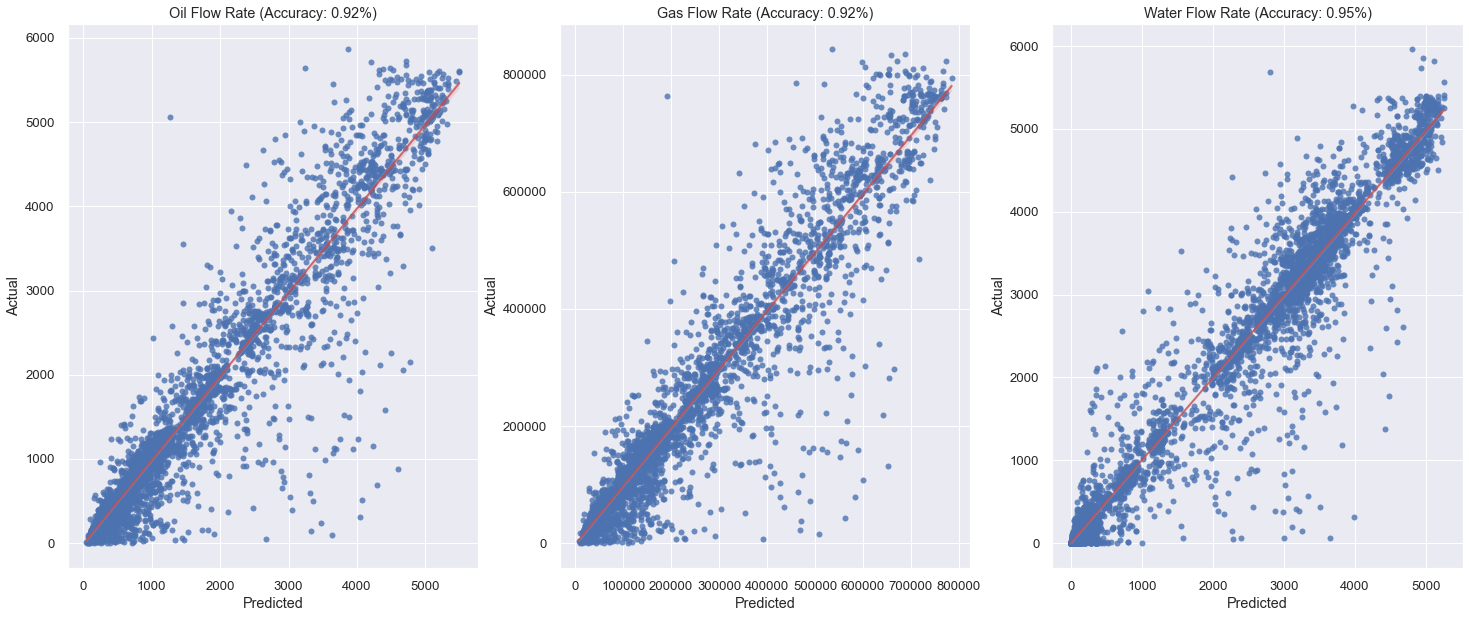

In [11]:
##Visualize KNN regression performance

flows_accuracies = [0.92, 0.92, 0.95]

#Scatter plot of predicted vs actual output for each flow
#Create figure and axes
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 10))
axes = [ax1, ax2, ax3]

for i in range(3):
    #Plot prediction vs actual for each flow
    x_train, x_test, y_train, y_test = split_data(flows_cols[i], well_df)
    reg = KNeighborsRegressor(n_neighbors=6)
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_train)

    sns.regplot(x=y_pred, y=y_train, line_kws={"color":"r","alpha":0.8,"lw":2}, ax=axes[i]).set(
        title=flows_titles[i]+" (Accuracy: {}%)".format(flows_accuracies[i]), xlabel='Predicted', ylabel='Actual')
plt.show()
plt.close()

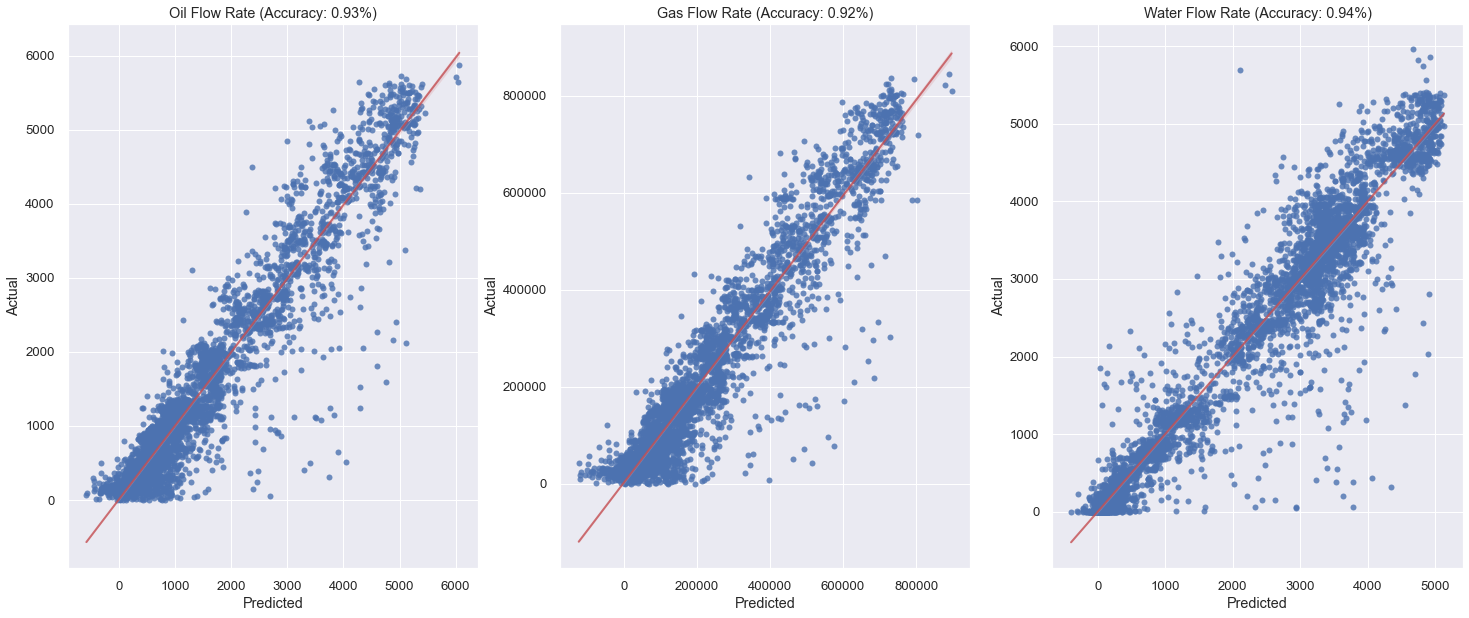

In [12]:
##Visualize Polynomial regression performance

flows_accuracies = [0.93, 0.92, 0.94]

#Scatter plot of predicted vs actual output for each flow
#Create figure and axes
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 10))
axes = [ax1, ax2, ax3]

for i in range(3):
    #Plot prediction vs actual for each flow
    x_train, x_test, y_train, y_test = split_data(flows_cols[i], well_df)
    poly = PolynomialFeatures(degree=15, include_bias=False)
    poly_features = poly.fit_transform(np.array(x_train))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, np.array(y_train))
    y_pred = poly_reg_model.predict(poly_features)

    sns.regplot(x=y_pred, y=y_train, line_kws={"color":"r","alpha":0.8,"lw":2}, ax=axes[i]).set(
        title=flows_titles[i]+" (Accuracy: {}%)".format(flows_accuracies[i]), xlabel='Predicted', ylabel='Actual')
plt.show()
plt.close()

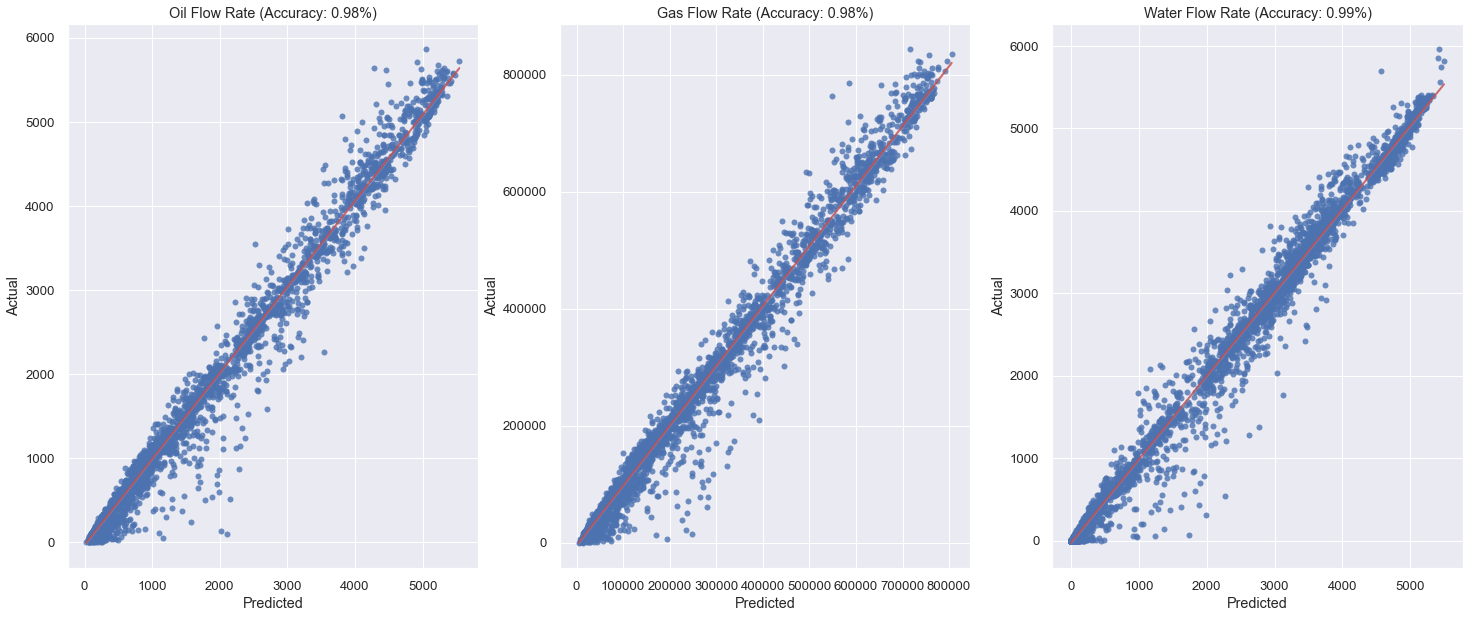

In [13]:
##Visualize RF regression performance

flows_accuracies = [0.98, 0.98, 0.99]

#Scatter plot of predicted vs actual output for each flow
#Create figure and axes
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 10))
axes = [ax1, ax2, ax3]

for i in range(3):
    #Plot prediction vs actual for each flow
    x_train, x_test, y_train, y_test = split_data(flows_cols[i], well_df)
    reg = RandomForestRegressor(n_estimators=100)
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_train)

    sns.regplot(x=y_pred, y=y_train, line_kws={"color":"r","alpha":0.8,"lw":2}, ax=axes[i]).set(
        title=flows_titles[i]+" (Accuracy: {}%)".format(flows_accuracies[i]), xlabel='Predicted', ylabel='Actual')
plt.show()
plt.close()

In [14]:
## Visualize the effect of hyperparameters

# The effect of "k-neighbours" on KNN regression

avg_r2_score_KNN_train = []
avg_r2_score_KNN_test = []
neighbors_settings = range(1, 100)

# Loop through every neighbours setting
for n in neighbors_settings:
    # Run model at this number of neighbours
    scores = run_model_KNN_reg(n)
    avg_train = (scores["BORE_OIL_VOL"][0] + scores["BORE_GAS_VOL"][0] + scores["BORE_WAT_VOL"][0]) / 3
    avg_test = (scores["BORE_OIL_VOL"][1] + scores["BORE_GAS_VOL"][1] + scores["BORE_WAT_VOL"][1]) / 3
    avg_r2_score_KNN_train.append(avg_train)
    avg_r2_score_KNN_test.append(avg_test)


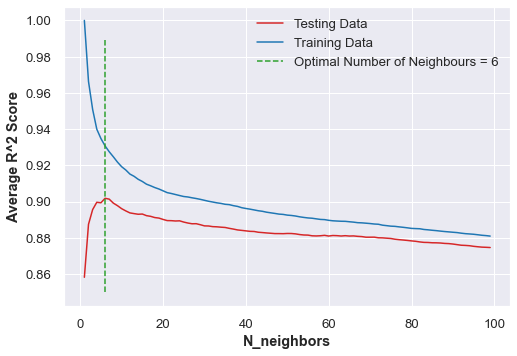

In [15]:
plt.plot(neighbors_settings, avg_r2_score_KNN_test, label="Testing Data", color = "tab:red")
plt.plot(neighbors_settings, avg_r2_score_KNN_train, label="Training Data", color = "tab:blue")
plt.plot([6]*100, np.linspace(0.85, 0.99, 100), "--", color = "tab:green", label = "Optimal Number of Neighbours = 6")
plt.ylabel("Average R^2 Score", weight = "bold")
plt.xlabel("N_neighbors", weight="bold")
plt.legend()

In [16]:
# The effect of "degrees" on Polynomial regression

avg_r2_score_poly_train = []
avg_r2_score_poly_test = []
degree_settings = range(1, 30)

# Loop through every neighbours setting
for n in degree_settings:
    # Run model at this number of neighbours
    scores = run_model_poly_reg(n)
    avg_train = (scores["BORE_OIL_VOL"][0] + scores["BORE_GAS_VOL"][0] + scores["BORE_WAT_VOL"][0]) / 3
    avg_test = (scores["BORE_OIL_VOL"][1] + scores["BORE_GAS_VOL"][1] + scores["BORE_WAT_VOL"][1]) / 3
    avg_r2_score_poly_train.append(avg_train)
    avg_r2_score_poly_test.append(avg_test)

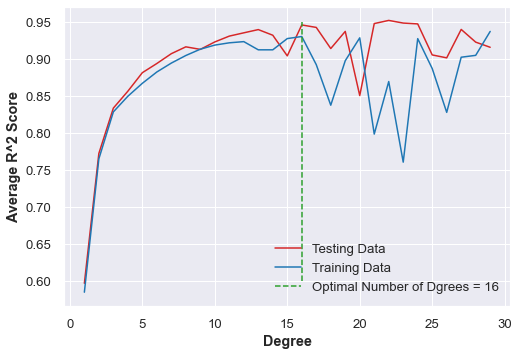

In [17]:
plt.plot(degree_settings, avg_r2_score_poly_test, label="Testing Data", color = "tab:red")
plt.plot(degree_settings, avg_r2_score_poly_train, label="Training Data", color = "tab:blue")
plt.plot([16]*100, np.linspace(0.6, 0.95, 100), "--", color = "tab:green", label = "Optimal Number of Dgrees = 16")
plt.ylabel("Average R^2 Score", weight = "bold")
plt.xlabel("Degree", weight="bold")
plt.legend()

In [18]:
# The effect of "estimators" on RF regression

avg_r2_score_RF_train = []
avg_r2_score_RF_test = []
est_settings = range(1, 70)

# Loop through every neighbours setting
for n in est_settings:
    # Run model at this number of neighbours
    scores = run_model_RF_reg(n)
    avg_train = (scores["BORE_OIL_VOL"][0] + scores["BORE_GAS_VOL"][0] + scores["BORE_WAT_VOL"][0]) / 3
    avg_test = (scores["BORE_OIL_VOL"][1] + scores["BORE_GAS_VOL"][1] + scores["BORE_WAT_VOL"][1]) / 3
    avg_r2_score_RF_train.append(avg_train)
    avg_r2_score_RF_test.append(avg_test)

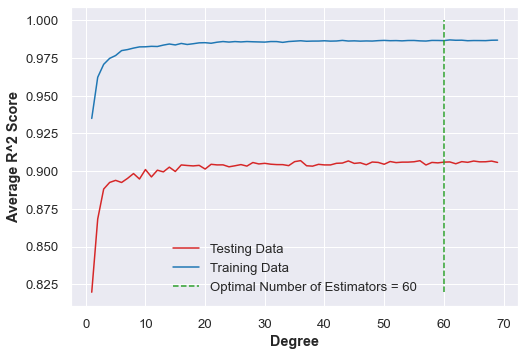

In [19]:
plt.plot(est_settings, avg_r2_score_RF_test, label="Testing Data", color = "tab:red")
plt.plot(est_settings, avg_r2_score_RF_train, label="Training Data", color = "tab:blue")
plt.plot([60]*100, np.linspace(0.82, 1, 100), "--", color = "tab:green", label = "Optimal Number of Estimators = 60")
plt.ylabel("Average R^2 Score", weight = "bold")
plt.xlabel("Degree", weight="bold")
plt.legend()

In [20]:
# Function to predict the flwos of a new datapoint using KNN

def test_point_KNN(point, n=6,  df = well_df):
    norm_point = normalize_point(point)
    pred_flow = {}
    for flow in list(well_df.columns)[5:]:
        x_train, x_test, y_train, y_test = split_data(flow)
        reg = KNeighborsRegressor(n_neighbors=n)
        reg.fit(x_train, y_train)
        pred = float("{:.3f}".format(reg.predict(norm_point)[0]))
        pred_flow[flow] = pred
    return pred_flow

def test_point_poly(point, n=16,  df = well_df):
    norm_point = normalize_point(point)
    pred_flow = {}
    for flow in list(well_df.columns)[5:]:
        x_train, x_test, y_train, y_test = split_data(flow)
        poly = PolynomialFeatures(degree=16, include_bias=False)
        poly_features = poly.fit_transform(np.array(x_train))
        poly_reg_model = LinearRegression()
        poly_reg_model.fit(poly_features, np.array(y_train))
        poly_features_new = poly.transform(np.array(norm_point))
        y_pred_new = poly_reg_model.predict(poly_features_new)
        pred_flow[flow] = float("{:.3f}".format(y_pred_new[0]))
    return pred_flow

def test_point_RF(point, n=100,  df = well_df):
    norm_point = normalize_point(point)
    pred_flow = {}
    for flow in list(well_df.columns)[5:]:
        x_train, x_test, y_train, y_test = split_data(flow)
        reg = RandomForestRegressor(n_estimators=n)
        reg.fit(x_train, y_train)
        pred = float("{:.3f}".format(reg.predict(norm_point)[0]))
        pred_flow[flow] = pred
    return pred_flow


In [21]:
print(test_point_KNN([50, 60, 20]))
print(test_point_poly([50, 60, 20]))
print(test_point_RF([50, 60, 20]))

{'BORE_OIL_VOL': 669.833, 'BORE_GAS_VOL': 98483.667, 'BORE_WAT_VOL': 362.833}
{'BORE_OIL_VOL': 1807.242, 'BORE_GAS_VOL': 236791.56, 'BORE_WAT_VOL': 493.293}
{'BORE_OIL_VOL': 841.67, 'BORE_GAS_VOL': 127796.92, 'BORE_WAT_VOL': 430.31}
